# PASO 1: Instalar librerías

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## PASO 1.1: Importar herramientas de modelado y evaluación

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

# PASO 2: Cargar dataset  y crear variable objetivo

In [31]:

df = pd.read_csv("retail_data_sample.csv")
# Crear variable objetivo: Compra_online
df["compra_online"] = (df["online_purchases"] > df["in_store_purchases"]).astype(int)

* (df["online_purchases"] > df["in_store_purchases"]) : Compara cada fila para ver si el número de compras online es mayor al número de compras en tienda física.

Esto devuelve una serie de valores True o False
* .astype(int)
Convierte los True en 1 y los False en 0, Se convierte el resultado booleano
* df["compra_online"] = Asigna ese resultado a una nueva columna en el DataFrame, llamada compra_online.

# Paso 3: Revisar estructura del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 79 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                10000 non-null  int64  
 1   age                        10000 non-null  int64  
 2   gender                     10000 non-null  object 
 3   income_bracket             10000 non-null  object 
 4   loyalty_program            10000 non-null  object 
 5   membership_years           10000 non-null  int64  
 6   churned                    10000 non-null  object 
 7   marital_status             10000 non-null  object 
 8   number_of_children         10000 non-null  int64  
 9   education_level            10000 non-null  object 
 10  occupation                 10000 non-null  object 
 11  transaction_id             10000 non-null  int64  
 12  transaction_date           10000 non-null  object 
 13  product_id                 10000 non-null  int6

# Paso 4: Descripción estadística general


In [5]:
df.describe(include='all')

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase,compra_online
count,10000.000000,10000.000000,10000,10000,10000,10000.000000,10000,10000,10000.000000,10000,...,10000,10000,10000,10000.000000,10000,10000,10000.000000,10000,10000.000000,10000.000000
unique,NaN,NaN,3,3,2,NaN,2,3,NaN,4,...,2,4,2,NaN,2,3,NaN,3,NaN,NaN
top,NaN,NaN,Other,Low,No,NaN,Yes,Married,NaN,PhD,...,No,Summer,No,NaN,No,High,NaN,High,NaN,NaN
freq,NaN,NaN,3391,3358,5094,NaN,5049,3399,NaN,2521,...,5028,2579,5028,NaN,5011,3402,NaN,3353,NaN,NaN
mean,157765.176700,48.040000,NaN,NaN,NaN,4.486800,NaN,NaN,2.009800,NaN,...,NaN,NaN,NaN,9.430800,NaN,NaN,49.865400,NaN,182.004200,0.503600
std,90853.288948,17.972192,NaN,NaN,NaN,2.879141,NaN,NaN,1.412835,NaN,...,NaN,NaN,NaN,5.727381,NaN,NaN,28.706638,NaN,105.364709,0.500012
min,17.000000,18.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,79964.250000,33.000000,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,5.000000,NaN,NaN,25.000000,NaN,90.000000,0.000000
50%,158743.000000,48.000000,NaN,NaN,NaN,4.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,9.000000,NaN,NaN,50.000000,NaN,181.000000,1.000000
75%,236601.750000,64.000000,NaN,NaN,NaN,7.000000,NaN,NaN,3.000000,NaN,...,NaN,NaN,NaN,14.000000,NaN,NaN,74.000000,NaN,274.000000,1.000000


# Visualización exploratoria

## Gráfico 1: Histograma de distribución de edad

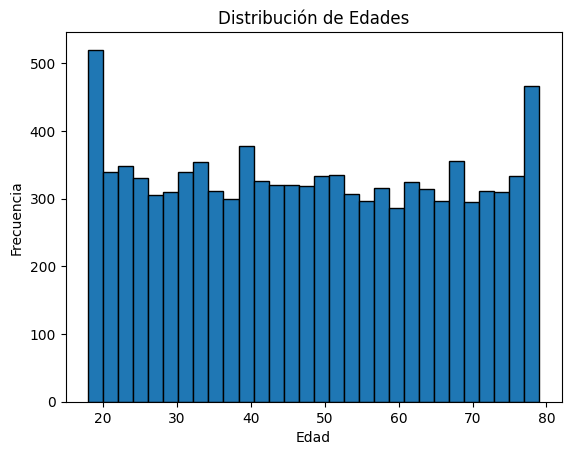

In [9]:

df['age'].dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Gráfico 2: Distribución de Preferencia de Canal de Compra

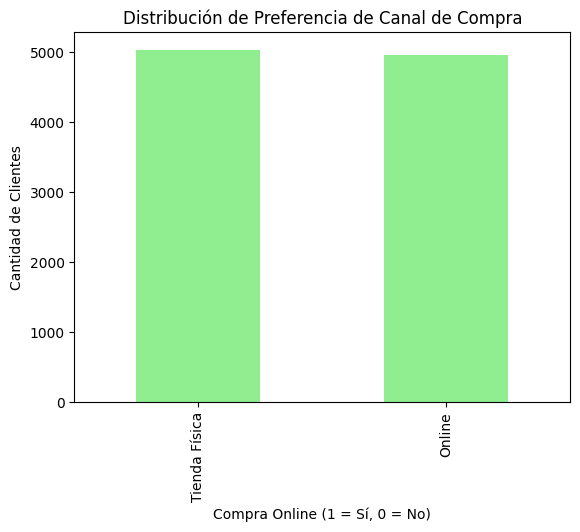

In [28]:
df['compra_online'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribución de Preferencia de Canal de Compra')
plt.xlabel("Compra Online (1 = Sí, 0 = No)")
plt.xticks([0, 1], ["Tienda Física", "Online"])
plt.ylabel('Cantidad de Clientes')
plt.show()

 # Paso 5: Evaluación del modelo antes de limpiar los datos

In [62]:

# Crear variable objetivo
df["compra_online"] = (df["online_purchases"] > df["in_store_purchases"]).astype(int)

# Seleccionar variables sin limpieza
df_before = df[["age", "website_visits",]].dropna()
Xb = df_before.copy()
yb = df.loc[df_before.index, "compra_online"]

# División entrenamiento / prueba
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

# Entrenar modelo
model_before = LogisticRegression(max_iter=1000)
model_before.fit(Xb_train, yb_train)

# Evaluar exactitud
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)
print("✅ Exactitud antes de la limpieza:", round(acc_before, 4))

✅ Exactitud antes de la limpieza: 0.4947


#### Este valor indica que el modelo de regresión logística logró una exactitud del 49.47% al predecir si un cliente prefiere comprar en línea (compra_online = 1) o en tienda física (compra_online = 0), utilizando únicamente las variables Edad (age), Visitas al sitio web (website_visits).

# Paso 6: Preparación del dataset: limpieza, imputación y codificación

In [69]:
selected_features = [
    "age", "gender", "income_bracket", "education_level",
    "purchase_frequency", "avg_discount_used", "preferred_store",
    "avg_items_per_transaction", "app_usage", "website_visits",
    "social_media_engagement", "season"
]

df_model = df[selected_features + ["compra_online"]].copy()

num_cols = df_model.select_dtypes(include=["float64", "int64"]).columns
imputer = SimpleImputer(strategy="median")
df_model[num_cols] = imputer.fit_transform(df_model[num_cols])

df_model = pd.get_dummies(df_model, drop_first=True)

X = df_model.drop(columns=["compra_online"])
y = df_model["compra_online"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Paso 7: Evaluación del modelo después de la limpieza

In [ ]:

# Variables seleccionadas por el usuario (sin 'season')
selected_vars = [
    "age", "gender", "income_bracket", "education_level",
    "purchase_frequency", "avg_discount_used", "preferred_store",
    "avg_items_per_transaction", "app_usage", "website_visits",
    "social_media_engagement"
]

# Subconjunto limpio
df_model = df[selected_vars + ["compra_online"]].copy()

# Imputación para variables numéricas
num_cols = df_clean.select_dtypes(include=["float64", "int64"]).columns
imputer = SimpleImputer(strategy="median")
df_clean[num_cols] = imputer.fit_transform(df_clean[num_cols])

# Codificación one-hot para categóricas
df_clean = pd.get_dummies(df_clean, drop_first=True)

# Separar X e y
Xc = df_clean.drop(columns=["compra_online"])
yc = df_clean["compra_online"]

# Escalado
scaler = MinMaxScaler()
Xc_scaled = scaler.fit_transform(Xc)

# División entrenamiento/prueba
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc_scaled, yc, test_size=0.3, random_state=42)

# Entrenamiento
model_after = LogisticRegression(max_iter=200)
model_after.fit(Xc_train, yc_train)
yc_pred = model_after.predict(Xc_test)

# Exactitud
acc_after = accuracy_score(yc_test, yc_pred)
acc_after

print("✅ Exactitud después de la limpieza:", round(acc_after, 4))

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("🌲 Random Forest Accuracy:", round(accuracy_score(y_test, rf_pred), 4))
print(classification_report(y_test, rf_pred))


In [ ]:
# Mapa de calor de correlaciones entre variables numéricas seleccionadas
numeric_df = df_model.select_dtypes(include=["float64", "int64"])
corr = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlación numérica")
plt.tight_layout()
plt.show()


In [ ]:
# Boxplot del valor promedio de ítems por transacción vs preferencia de compra
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="compra_online", y="avg_items_per_transaction")
plt.title("Promedio de Ítems por Transacción vs Preferencia de Compra")
plt.xlabel("Compra Online (1=Sí)")
plt.ylabel("Ítems por Transacción")
plt.grid(True)
plt.show()


In [ ]:
# Barras de frecuencia por nivel educativo
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="education_level", order=df["education_level"].value_counts().index)
plt.title("Frecuencia por Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Comparación de visitas al sitio web entre grupos de compra
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="compra_online", y="website_visits", inner="quartile")
plt.title("Visitas al Sitio Web según Preferencia de Compra")
plt.xlabel("Compra Online (1=Sí)")
plt.ylabel("Visitas al Sitio Web")
plt.grid(True)
plt.show()


In [ ]:
log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_prob = log_model.predict_proba(X_test)[:, 1]

print("📊 Logistic Regression Accuracy:", round(accuracy_score(y_test, log_pred), 4))
print(classification_report(y_test, log_pred))


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("🔎 KNN Accuracy:", round(accuracy_score(y_test, knn_pred), 4))
print(classification_report(y_test, knn_pred))


In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

print("🌳 Árbol de Decisión Accuracy:", round(accuracy_score(y_test, tree_pred), 4))
print(classification_report(y_test, tree_pred))

plt.figure(figsize=(14, 6))
plot_tree(tree_model, filled=True, max_depth=3, feature_names=X.columns, class_names=["Tienda", "Online"])
plt.title("Árbol de Decisión (primeros niveles)")
plt.show()


In [ ]:
fpr, tpr, _ = roc_curve(y_test, log_prob)
roc_auc = roc_auc_score(y_test, log_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.grid(True)
plt.show()

ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


In [ ]:
importances = rf_model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title("Importancia de variables (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


In [ ]:
models = {
    "Random Forest": rf_model,
    "Regresión Logística": LogisticRegression(max_iter=300),
    "KNN": KNeighborsClassifier(),
    "Árbol de Decisión": DecisionTreeClassifier()
}

print("📊 Comparación de exactitud (Validación Cruzada - 5 folds):\n")
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring="accuracy")
    print(f"{name:20}: {scores.mean():.3f} ± {scores.std():.3f}")
